In [1]:
#Primero importamos las libreías que nos van a hacer falta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

In [2]:
#Después nos traemos el archivo de datos
df = pd.read_excel(r'C:\Users\Usuario\Desktop\Programación\Proyecto Análisis de Datos Entrenos\nuevaapp\Datos.xlsx')

In [8]:
# Calcular estadísticas básicas por ejercicio
estadisticas_basicas_por_ejercicio = df.groupby('Ejercicio').describe().round(2)

# Eliminar la columna 'count'
estadisticas_basicas_por_ejercicio = estadisticas_basicas_por_ejercicio.drop([('Unnamed: 0', 'count')], axis=1)

# Transponer el MultiIndex para mostrar las estadísticas básicas en función del ejercicio
estadisticas_basicas_por_ejercicio = estadisticas_basicas_por_ejercicio.stack(0).unstack(0)

# Eliminar la fila 'Unnamed: 0'
estadisticas_basicas_por_ejercicio = estadisticas_basicas_por_ejercicio.drop('Unnamed: 0', axis=0)

#Eliminar columna count
estadisticas_basicas_por_ejercicio = estadisticas_basicas_por_ejercicio.drop('count', axis=1)

# Visualizar las estadísticas básicas por ejercicio
display(estadisticas_basicas_por_ejercicio)

25%                           \
Ejercicio              CMJ FREE ARMS DOMINADAS PRESS DE BANCA   
Peso (kg)                      84.00     84.00          55.00   
VMP (m/s)                       1.70      0.68           0.57   
Velocidad máxima (m/s)          2.45      1.03           0.74   
nº Rep                          1.00      2.00           2.00   
nº Serie                        1.00      1.00           1.00   

                                                                          50%  \
Ejercicio              SENTADILLA BARRA ALTA SENTADILLA FRONTAL CMJ FREE ARMS   
Peso (kg)                              60.00              52.50         84.00   
VMP (m/s)                               0.69               0.59          1.81   
Velocidad máxima (m/s)                  1.50               1.26          2.62   
nº Rep                                  1.00               1.00          1.00   
nº Serie                                2.00               1.25          2.00   

                                                                       \
Ejercicio              DOMINADAS PRESS DE BANCA SENTADILLA BARRA ALTA   
Peso (kg)                  84.00          60.00                 80.00   
VMP (m/s)                   0.74           0.67                  0.80   
Velocidad máxima (m/s)      1.15           0.86                  1.63   
nº Rep                      3.00           3.00                  1.00   
nº Serie                    2.00           2.00                  4.00   

                                           ...           min            \
Ejercicio              SENTADILLA FRONTAL  ... CMJ FREE ARMS DOMINADAS   
Peso (kg)                           65.00  ...         84.00     84.00   
VMP (m/s)                            0.69  ...          0.53      0.50   
Velocidad máxima (m/s)               1.40  ...          1.15      0.77   
nº Rep                               2.00  ...          1.00      1.00   
nº Serie                             2.00  ...          1.00      1.00   

                                                             \
Ejercicio              PRESS DE BANCA SENTADILLA BARRA ALTA   
Peso (kg)                       20.00                 20.00   
VMP (m/s)                        0.31                  0.49   
Velocidad máxima (m/s)           0.44                  1.23   
nº Rep                           1.00                  1.00   
nº Serie                         1.00                  1.00   

                                                    std            \
Ejercicio              SENTADILLA FRONTAL CMJ FREE ARMS DOMINADAS   
Peso (kg)                           20.00        163.21      0.48   
VMP (m/s)                            0.33          0.35      0.08   
Velocidad máxima (m/s)               0.80          0.36      0.16   
nº Rep                               1.00          0.20      1.62   
nº Serie                             1.00          1.06      1.16   

                                                                                
Ejercicio              PRESS DE BANCA SENTADILLA BARRA ALTA SENTADILLA FRONTAL  
Peso (kg)                       10.80                 27.23              14.01  
VMP (m/s)                        0.24                  0.27               0.17  
Velocidad máxima (m/s)           0.31                  0.30               0.22  
nº Rep                           2.39                  0.72               1.08  
nº Serie                         1.17                  3.18               1.29  

[5 rows x 35 columns]

In [9]:
estadisticas_basicas_por_ejercicio.columns

MultiIndex([( '25%',         'CMJ FREE ARMS'),
            ( '25%',             'DOMINADAS'),
            ( '25%',        'PRESS DE BANCA'),
            ( '25%', 'SENTADILLA BARRA ALTA'),
            ( '25%',    'SENTADILLA FRONTAL'),
            ( '50%',         'CMJ FREE ARMS'),
            ( '50%',             'DOMINADAS'),
            ( '50%',        'PRESS DE BANCA'),
            ( '50%', 'SENTADILLA BARRA ALTA'),
            ( '50%',    'SENTADILLA FRONTAL'),
            ( '75%',         'CMJ FREE ARMS'),
            ( '75%',             'DOMINADAS'),
            ( '75%',        'PRESS DE BANCA'),
            ( '75%', 'SENTADILLA BARRA ALTA'),
            ( '75%',    'SENTADILLA FRONTAL'),
            ( 'max',         'CMJ FREE ARMS'),
            ( 'max',             'DOMINADAS'),
            ( 'max',        'PRESS DE BANCA'),
            ( 'max', 'SENTADILLA BARRA ALTA'),
            ( 'max',    'SENTADILLA FRONTAL'),
            ('mean',         'CMJ FREE ARMS'),
            (

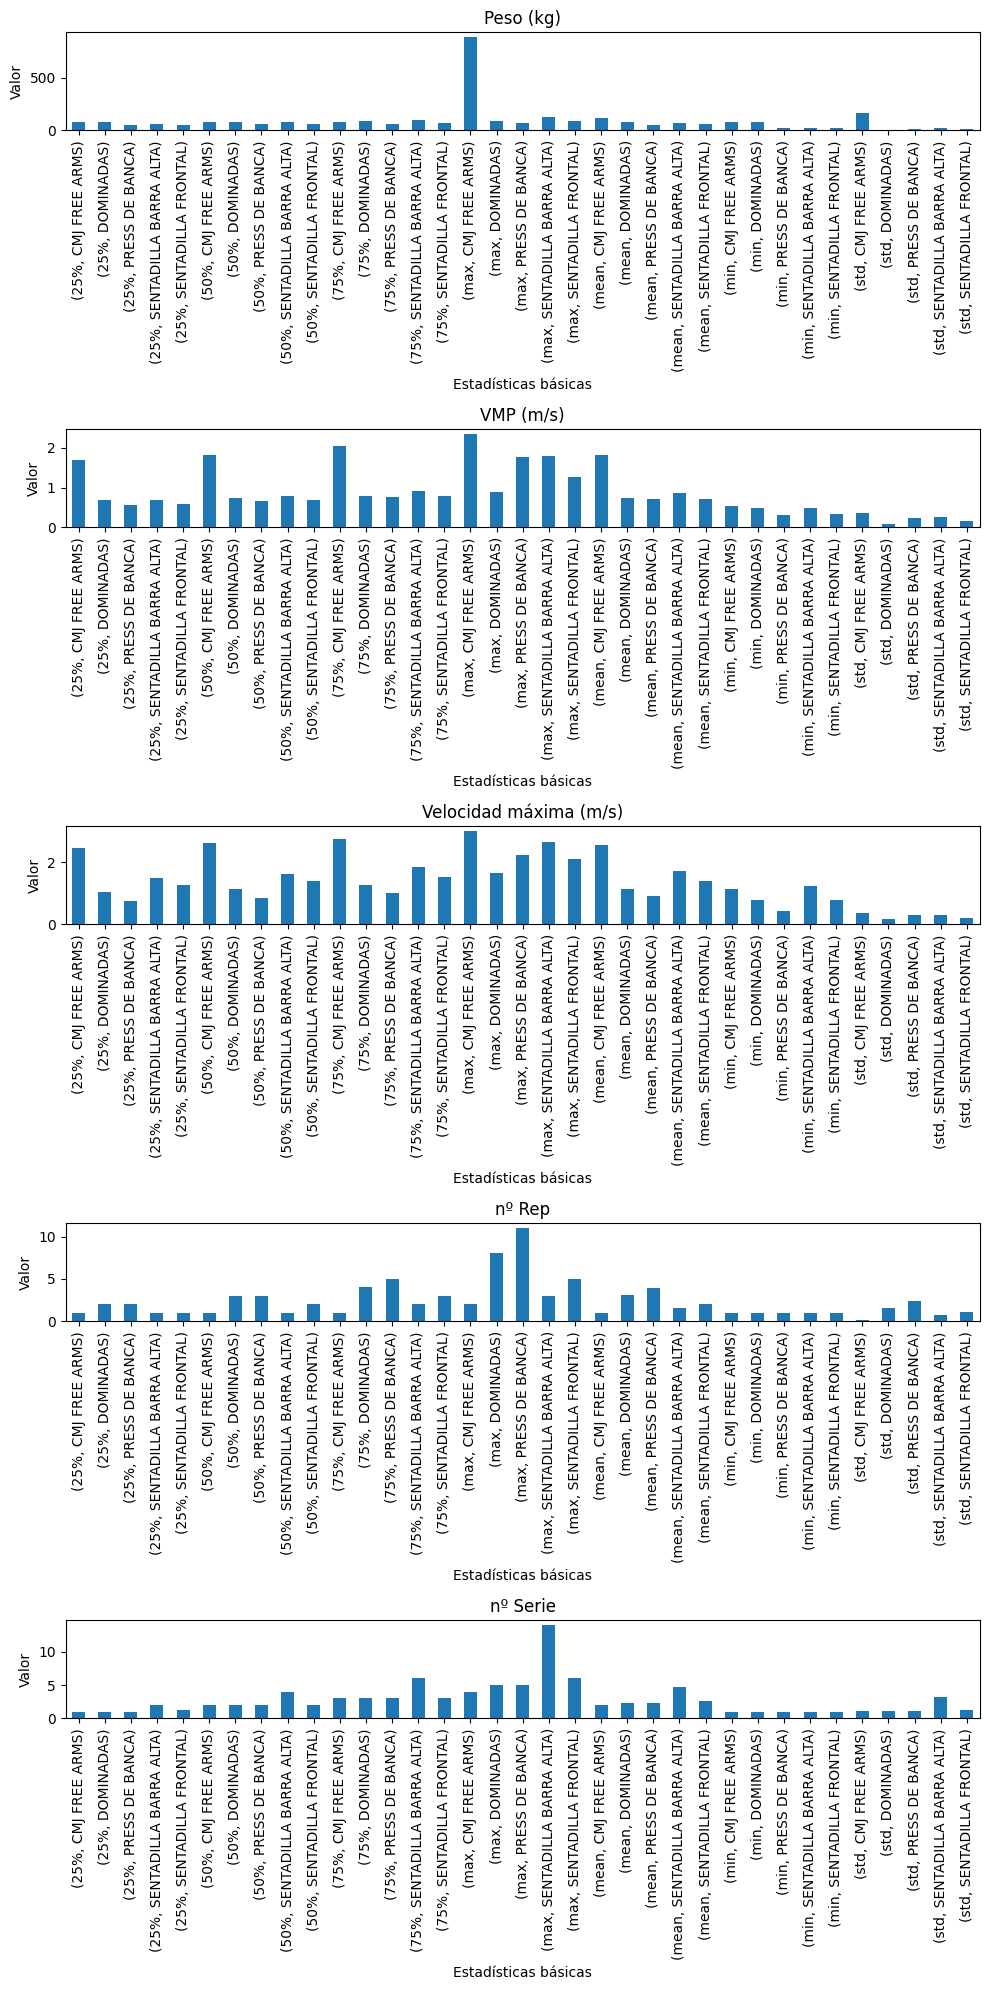

In [10]:
# Transponer el DataFrame para facilitar la creación de gráficos de barras apiladas
estadisticas_transpuestas = estadisticas_basicas_por_ejercicio.transpose()

# Crear gráficos de barras apiladas para cada columna en función del ejercicio
fig, axes = plt.subplots(nrows=len(estadisticas_transpuestas.columns), figsize=(10, len(estadisticas_transpuestas.columns) * 4))
for idx, (column, ax) in enumerate(zip(estadisticas_transpuestas.columns, axes)):
    estadisticas_transpuestas[column].plot.bar(stacked=True, ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Valor')
    ax.set_xlabel('Estadísticas básicas')
    
plt.tight_layout()
plt.show()